United States: 326687501


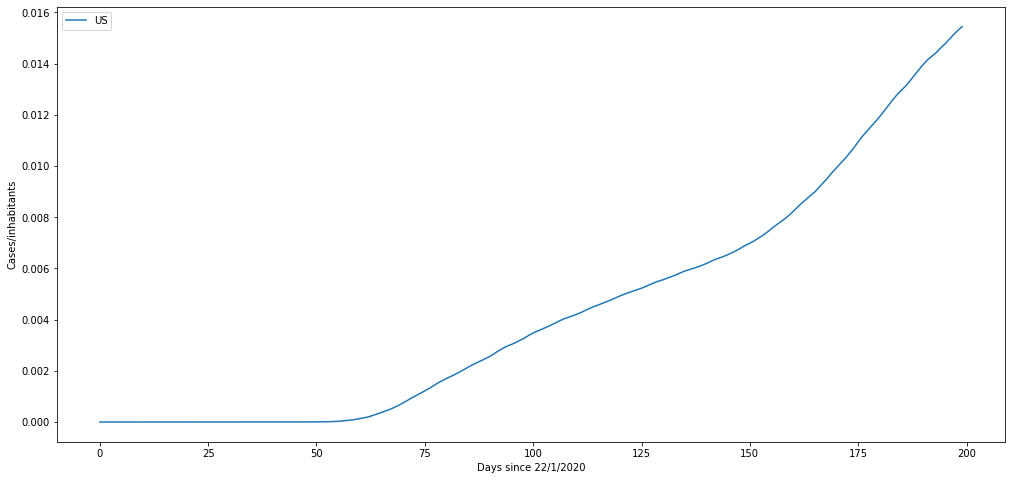

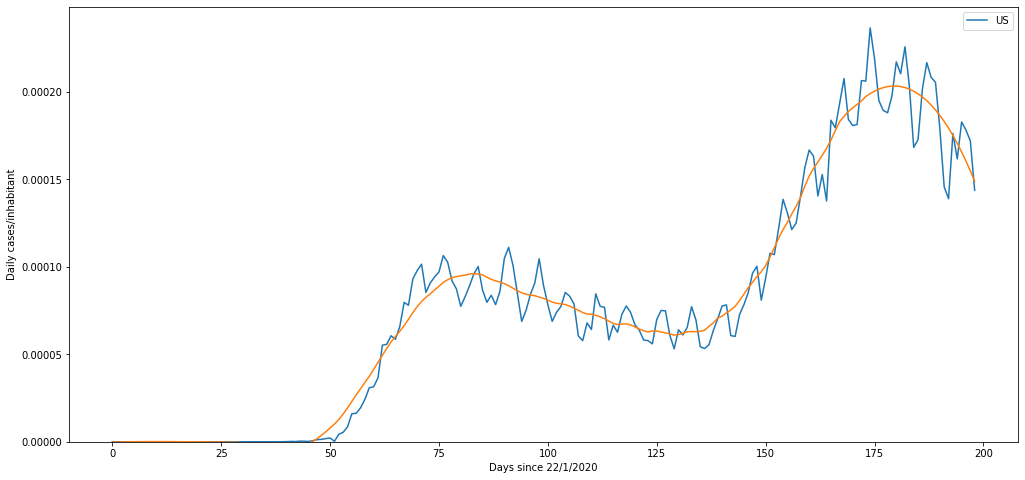

In [20]:
###########################################################################
#
#    covid19.py - Analyse data of the spread of the COVID19
#    Copyright (C) 2020 giovanni.organtini@uniroma1.it
#
#    This program is free software: you can redistribute it and/or modify
#    it under the terms of the GNU General Public License as published by
#    the Free Software Foundation, either version 3 of the License, or
#    (at your option) any later version.
#
#    This program is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#    GNU General Public License for more details.
#
#    You should have received a copy of the GNU General Public License
#    along with this program.  If not, see <https://www.gnu.org/licenses/>.
#
###########################################################################
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wget
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
urlc = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# download data
w = pd.read_csv(wget.download(urlc), header = [0])
w = w.groupby('Country/Region', as_index=False).sum()

# select data
#countries = ['Italy', 'Germany', 'United Kingdom', 'Spain']
countries = ['US']

# get population (data avilable till 2018)
urlp = 'https://raw.githubusercontent.com/datasets/population/master/data/population.csv'
wp = pd.read_csv(wget.download(urlp), header = [0])
population = {}
for country in countries:
    # manage differences in naming
    if country == 'US':
        country = 'United States'
    df = wp.loc[(wp['Country Name'] == country) & (wp['Year'] == 2018)]
    population[country] = df.iloc[0]['Value']
    print(f'{country}: ' + str(population[country]))
    if country == 'United States':
        population['US'] = population[country]

# count cases
plt.figure(figsize=(17,8))
for country in countries:
    select_country = w.loc[w['Country/Region'] == country]
    cases = select_country.values.tolist()[0][4:]/population[country]
    plt.plot(cases, label = country)

# plot
plt.xlabel('Days since 22/1/2020')
plt.ylabel('Cases/inhabitants')
plt.legend()
plt.savefig('cases.png')
plt.show()

# make a plot of derivatives
plt.figure(figsize=(17,8))
for country in countries:
    select_country = w.loc[w['Country/Region'] == country]
    cases = select_country.values.tolist()[0][4:]/population[country]
    diff = []
    d2   = []
    for x, y in zip(cases[0::], cases[1::]):
        diff.append(y - x)
    plt.plot(diff, label = country)
    yhat = savgol_filter(diff, 51, 3)
    plt.plot(yhat)
    
# plot
plt.xlabel('Days since 22/1/2020')
plt.ylabel('Daily cases/inhabitant')
plt.legend()
plt.ylim(0)
plt.savefig('dailycases.png')
plt.show()